# Quantum Process Tomography of Time Evolution circuits

### Import necessary libraries

In [ ]:
pip install qiskit_experiments

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.5/727.5 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.3 MB/s eta 0:00:00


In [ ]:
pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
pip install qiskit

In [ ]:
pip install h5py

In [ ]:
pip install qiskit_ibm_runtime

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.1 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.55.2-py3-none-any.whl size=339687 sha256=2197a170918afc28ca4a6d7cfcf065705c35fe015c85fbfb1c72768b65a7f2b1
  Stored in directory: /root/.cache/pip/wheels/af/ef/67/6c17a948d54c37e26b0c927dc206d95a258e9a3f7ba7014c67
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.20.4-py3-none-any.whl size=102561 sha256=b7295f7c3827d8aa34b7ccde3dff167dc275a78119c45aa4f018b3bf003968cc
  Stored in directory: /root/.cache/pip/wheels/b9/ce/35/49177324cf29a507d20ea78e9b859a56a449fdc92d3b617ead
Successfully built ibm-platform-services ibm-cloud-sdk-core
  Attempting uninstal

In [ ]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.4 MB/s eta 0:00:00


In [ ]:
from qiskit.visualization import *
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Operator, Pauli, PauliList, pauli_basis, Statevector, DensityMatrix, Chi, Kraus, PTM, random_pauli_list, process_fidelity
from qiskit.circuit import ParameterVector, Parameter
from qiskit.circuit.library import PauliEvolutionGate, UGate
from qiskit.circuit.library import UnitaryGate, HamiltonianGate
from qiskit_ibm_runtime.options import *
from qiskit.circuit.library import HGate, XGate, ZGate, SGate, SdgGate, IQP
import itertools
from qiskit.quantum_info import Statevector, SparsePauliOp, random_hermitian
from qiskit.visualization import plot_state_city
from scipy.optimize import curve_fit
from qiskit_experiments.library.tomography import TomographyExperiment, tomography_analysis, ProcessTomography, ProcessTomographyAnalysis
import h5py as h5
from qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2 as Estimator, SamplerV2 as Sampler, Batch
from qiskit_ibm_runtime.fake_provider import FakeKyoto
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
import ast
from IPython.display import display
from qiskit import qpy

### Backends

In [ ]:
QiskitRuntimeService.delete_account()


False

In [ ]:
# Save an IBM Quantum account.
#QiskitRuntimeService.save_account(channel="ibm_quantum", token="Your-token-goes-here", overwrite=True)

service = QiskitRuntimeService(channel = 'ibm_cloud',token='Ae2weSjLWDPKZZM0uN0YGUeFqKrcDcrui4bCWNt5LtM-')
#qasm_simulator = service.backend("ibmq_qasm_simulator")
kyoto = service.backend("ibm_kyoto")
sherbrooke = service.backend("ibm_sherbrooke")
fake_kyoto = FakeKyoto()
aersim = AerSimulator()

In [ ]:
fez = service.backend("ibm_fez")

### Optimised circuit parameters

#### 3 qubits

In [ ]:
f_nn_L3 = h5.File('Optimized_circuit_nn_order2_L3_T1.0_J1.0.h5', 'r')
Fidelity_1_Layers_nn_L3 = np.array(f_nn_L3['Fidelity_1_Layers'])
Fidelity_2_Layers_nn_L3 = np.array(f_nn_L3['Fidelity_2_Layers'])
Fidelity_3_Layers_nn_L3 = np.array(f_nn_L3['Fidelity_3_Layers'])
Fidelity_4_Layers_nn_L3 = np.array(f_nn_L3['Fidelity_4_Layers'])
Fidelity_5_Layers_nn_L3 = np.array(f_nn_L3['Fidelity_5_Layers'])
Fidelity_6_Layers_nn_L3 = np.array(f_nn_L3['Fidelity_6_Layers'])

fidelities_all_layers_nn_L3 = [Fidelity_1_Layers_nn_L3, Fidelity_2_Layers_nn_L3,Fidelity_3_Layers_nn_L3, Fidelity_4_Layers_nn_L3, Fidelity_5_Layers_nn_L3, Fidelity_6_Layers_nn_L3]

Parameters_bulk_1_Layers_nn_L3 = np.array(f_nn_L3['Parameters_bulk_1_Layers'])
Parameters_bulk_2_Layers_nn_L3 = np.array(f_nn_L3['Parameters_bulk_2_Layers'])
Parameters_bulk_3_Layers_nn_L3 = np.array(f_nn_L3['Parameters_bulk_3_Layers'])
Parameters_bulk_4_Layers_nn_L3 = np.array(f_nn_L3['Parameters_bulk_4_Layers'])
Parameters_bulk_5_Layers_nn_L3 = np.array(f_nn_L3['Parameters_bulk_5_Layers'])
Parameters_bulk_6_Layers_nn_L3 = np.array(f_nn_L3['Parameters_bulk_6_Layers'])

parameters_bulk_all_layers_nn_L3 = [Parameters_bulk_1_Layers_nn_L3,Parameters_bulk_2_Layers_nn_L3,Parameters_bulk_3_Layers_nn_L3,Parameters_bulk_4_Layers_nn_L3,Parameters_bulk_5_Layers_nn_L3,Parameters_bulk_6_Layers_nn_L3]


Parameters_last_1_Layers_nn_L3 = np.array(f_nn_L3['Parameters_last_1_Layers'])
Parameters_last_2_Layers_nn_L3 = np.array(f_nn_L3['Parameters_last_2_Layers'])
Parameters_last_3_Layers_nn_L3 = np.array(f_nn_L3['Parameters_last_3_Layers'])
Parameters_last_4_Layers_nn_L3 = np.array(f_nn_L3['Parameters_last_4_Layers'])
Parameters_last_5_Layers_nn_L3 = np.array(f_nn_L3['Parameters_last_5_Layers'])
Parameters_last_6_Layers_nn_L3 = np.array(f_nn_L3['Parameters_last_6_Layers'])

parameters_last_all_layers_nn_L3 = [Parameters_last_1_Layers_nn_L3,Parameters_last_2_Layers_nn_L3,Parameters_last_3_Layers_nn_L3,Parameters_last_4_Layers_nn_L3,Parameters_last_5_Layers_nn_L3,Parameters_last_6_Layers_nn_L3]

#### 4 qubits - ring

In [ ]:
f_nn_L4 = h5.File('Optimized_circuit_ring_L4_T1.0_J1.0.h5', 'r')
Fidelity_1_Layers_nn_L4 = np.array(f_nn_L4['Fidelity_1_Layers'])
Fidelity_2_Layers_nn_L4 = np.array(f_nn_L4['Fidelity_2_Layers'])

fidelities_all_layers_nn_L4 = [Fidelity_1_Layers_nn_L4, Fidelity_2_Layers_nn_L4]

Parameters_bulk_1_Layers_nn_L4 = np.array(f_nn_L4['Parameters_bulk_1_Layers'])
Parameters_bulk_2_Layers_nn_L4 = np.array(f_nn_L4['Parameters_bulk_2_Layers'])

parameters_bulk_all_layers_nn_L4 = [Parameters_bulk_1_Layers_nn_L4,Parameters_bulk_2_Layers_nn_L4]

Parameters_last_1_Layers_nn_L4 = np.array(f_nn_L4['Parameters_last_1_Layers'])
Parameters_last_2_Layers_nn_L4 = np.array(f_nn_L4['Parameters_last_2_Layers'])

parameters_last_all_layers_nn_L4 = [Parameters_last_1_Layers_nn_L4,Parameters_last_2_Layers_nn_L4]

In [ ]:
print(f_nn_L4.keys())

<KeysViewHDF5 ['Fidelity_1_Layers', 'Fidelity_2_Layers', 'Parameters_bulk_1_Layers', 'Parameters_bulk_2_Layers', 'Parameters_last_1_Layers', 'Parameters_last_2_Layers', 'Unitary_matrix_1_Layers', 'Unitary_matrix_2_Layers']>


#### 5 qubits

In [ ]:
f_nn_L5 = h5.File('Optimized_circuit_nn_order2_L5_T1.0_J1.0.h5', 'r')
Fidelity_1_Layers_nn_L5 = np.array(f_nn_L5['Fidelity_1_Layers'])
Fidelity_2_Layers_nn_L5 = np.array(f_nn_L5['Fidelity_2_Layers'])
Fidelity_3_Layers_nn_L5 = np.array(f_nn_L5['Fidelity_3_Layers'])
Fidelity_4_Layers_nn_L5 = np.array(f_nn_L5['Fidelity_4_Layers'])
Fidelity_5_Layers_nn_L5 = np.array(f_nn_L5['Fidelity_5_Layers'])
Fidelity_6_Layers_nn_L5 = np.array(f_nn_L5['Fidelity_6_Layers'])
Parameters_bulk_1_Layers_nn_L5 = np.array(f_nn_L5['Parameters_bulk_1_Layers'])
Parameters_bulk_2_Layers_nn_L5 = np.array(f_nn_L5['Parameters_bulk_2_Layers'])
Parameters_bulk_3_Layers_nn_L5 = np.array(f_nn_L5['Parameters_bulk_3_Layers'])
Parameters_bulk_4_Layers_nn_L5 = np.array(f_nn_L5['Parameters_bulk_4_Layers'])
Parameters_bulk_5_Layers_nn_L5 = np.array(f_nn_L5['Parameters_bulk_5_Layers'])
Parameters_bulk_6_Layers_nn_L5 = np.array(f_nn_L5['Parameters_bulk_6_Layers'])
Parameters_last_1_Layers_nn_L5 = np.array(f_nn_L5['Parameters_last_1_Layers'])
Parameters_last_2_Layers_nn_L5 = np.array(f_nn_L5['Parameters_last_2_Layers'])
Parameters_last_3_Layers_nn_L5 = np.array(f_nn_L5['Parameters_last_3_Layers'])
Parameters_last_4_Layers_nn_L5 = np.array(f_nn_L5['Parameters_last_4_Layers'])
Parameters_last_5_Layers_nn_L5 = np.array(f_nn_L5['Parameters_last_5_Layers'])
Parameters_last_6_Layers_nn_L5 = np.array(f_nn_L5['Parameters_last_6_Layers'])

### Optimised circuit

In [ ]:
# define the single-qubit Paulis

I = np.asarray([[1, 0], [0, 1]])
X = np.asarray([[0, 1], [1, 0]])
Y = np.asarray([[0, -1j], [1j, 0]])
Z = np.asarray([[1, 0], [0, -1]])

H = np.array([[1,1],[1,-1]])/np.sqrt(2)
S = np.array([[1,0],[0,1j]])
SDG = S.T.conj()

In [ ]:
# construct the general two-qubit gate

def my_one_qubit_gate(phi):
    matrix = [[np.exp(1j*phi[1])*np.cos(phi[0]), np.exp(1j*phi[2])*np.sin(phi[0])],[-np.exp(-1j*phi[2])*np.sin(phi[0]), np.exp(-1j*phi[1])*np.cos(phi[0])]]
    return UnitaryGate(Operator(matrix))

def one_qubit_gate(phi):
    return UGate(-2*phi[0], -phi[1]-phi[2], -phi[1]+phi[2]) * np.exp(1j*phi[1])

def two_qubit_gate(Lambda):
    matrix = Lambda[0]*np.kron(X,X) + Lambda[1]*np.kron(Y,Y) + Lambda[2]*np.kron(Z,Z)

    return HamiltonianGate(matrix, time = 1)

def general_gate(circuit, i, j, theta):
    # assumes that the theta parameters are received in dimension [3,3]

    circuit.append(my_one_qubit_gate(theta[1]), [i])
    circuit.append(my_one_qubit_gate(theta[2]), [j])
    circuit.append(two_qubit_gate(theta[0]), [i,j])

def optimised_circuit(L, Depth, theta_values, theta_last_layer):
    # construct L-qubit circuit of Depth, with parameters theta

    circuit = QuantumCircuit(L)  # empty circuit

    gate_index = 0 # count at which gate we are

    for _ in range(Depth):

        # at each depth, first go over the even pairs, then the odd pairs

        for i in range(0, L-1, 2):   # even pairs

            theta = theta_values[gate_index]     # get parameters for current gate
            general_gate(circuit, i, i+1, theta) # apply the gate
            gate_index += 1                      # go to the next gate

        for i in range(1, L-1, 2):   # odd pairs

            theta = theta_values[gate_index]     # get parameters for current gate
            general_gate(circuit, i, i+1, theta) # apply the gate
            gate_index += 1                      # go to the next gate

    # now apply single-qubit gates on the last layer

    for i in range(L):
        theta = theta_last_layer[i]
        circuit.append(my_one_qubit_gate(theta), [i])

    return circuit.to_instruction()

### General stuff

In [ ]:
def print_file_keys(file):
    keys = list(file.keys())
    for key in keys:
        print(key)

def copy_identical(a, b, exp_chi, exact_chi, neighbour_precision, N):

    real_exp_a_b = np.abs(exp_chi[a, b].real)
    imag_exp_a_b = np.abs(exp_chi[a, b].imag)

    real_exact_a_b = np.abs(exact_chi[a, b].real)
    imag_exact_a_b = np.abs(exact_chi[a, b].imag)

    # only look in the lower half

    for i in range(N):
        for j in range(i):

            real_exact_i_j = np.abs(exact_chi[i,j].real)
            imag_exact_i_j = np.abs(exact_chi[i,j].imag)

            real_exp_i_j = np.abs(exp_chi[i,j].real)
            imag_exp_i_j = np.abs(exp_chi[i,j].imag)

            if (real_exp_i_j < 1e-17):  # there is no real part here experimentally
                if real_exact_a_b > 1e-17: # we are not dividing by zero
                    if np.abs((real_exact_a_b - real_exact_i_j)/real_exact_a_b) < neighbour_precision: # they are identical

                        if np.abs(exact_chi[i,j]) < 1e-17:
                            print(real_exact_a_b, real_exact_i_j)

                        if real_exact_a_b * real_exact_i_j > 0:
                            exp_chi[i, j] += real_exp_a_b

                        else:
                            exp_chi[i, j] -= real_exp_a_b

            if (imag_exp_i_j < 1e-17):  # there is no imag part here experimentally
                if imag_exact_a_b > 1e-17: # we are not dividing by zero
                    if np.abs((imag_exact_a_b - imag_exact_i_j)/imag_exact_a_b) < neighbour_precision: # they are identical


                        if np.abs(exact_chi[i,j]) < 1e-17:
                            print(real_exact_a_b, real_exact_i_j)

                        if imag_exact_a_b * imag_exact_i_j > 0:
                            exp_chi[i, j] += 1j*imag_exp_a_b

                        else:
                            exp_chi[i, j] -= 1j*imag_exp_a_b



### Trotterization

In [ ]:
# Build a subcircuit for two-qubit xxyyzz gate

def gate(t):
    return HamiltonianGate(np.kron(X, X)/4+np.kron(Y, Y)/4+np.kron(Z, Z)/4, time = t)

def U1(t, L):
    U1 = QuantumCircuit(L, name='U1')
    for i in range(0, L - 1, 2):
        U1.append(gate(t), [i, i+1])
    return U1.to_gate()

def U2(t, L):
    U2  = QuantumCircuit(L, name='U2')
    for i in range(1, L - 1, 2):
        U2.append(gate(t), [i, i+1])
    return U2.to_gate()

def U_ring(t, L):
    U_ring = QuantumCircuit(L, name = 'U_ring')
    U_ring.append(gate(t), [L-1, 0])
    return U_ring.to_gate()

def U3(t, L):
    U3  = QuantumCircuit(L, name='U3')
    if L > 2:
        for i in range(0, L - 2, 3):
            U3.append(gate(t), [i, i+2])
    return U3.to_gate()

def U4(t, L):
    U4  = QuantumCircuit(L, name='U4')
    if L > 3:
        for i in range(1, L - 2, 3):
            U4.append(gate(t), [i, i+2])
    return U4.to_gate()

def U5(t, L):
    U5  = QuantumCircuit(L, name='U5')
    if L > 4:
        for i in range(2, L - 2, 3):
            U5.append(gate(t), [i, i+2])
    return U5.to_gate()

U = [U1, U2, U3, U4, U5]

def Trotterization_nn_2nd(L, target_time, trotter_steps):

    dt = target_time/trotter_steps

    # Initialize quantum circuit for L qubits
    trotter_circuit = QuantumCircuit(L)

    # Simulate time evolution under Hamiltonian
    trotter_circuit.append(U1(dt/2, L), range(L))
    trotter_circuit.append(U2(dt, L), range(L))


    for _ in range(trotter_steps-1):
        trotter_circuit.append(U1(dt, L), range(L))
        trotter_circuit.append(U2(dt, L), range(L))

    trotter_circuit.append(U1(dt/2, L), range(L))

    copy = trotter_circuit.copy()

    return trotter_circuit.to_instruction()


def Trotterization_ring_2nd(L, target_time, trotter_steps):

    dt = target_time/trotter_steps

    # Initialize quantum circuit for L qubits
    trotter_circuit = QuantumCircuit(L)

    # Simulate time evolution under Hamiltonian

    trotter_circuit.append(U1(dt/2, L), range(L))

    for _ in range(trotter_steps - 1):

        trotter_circuit.append(U2(dt/2, L), range(L))
        trotter_circuit.append(U_ring(dt, L), range(L))
        trotter_circuit.append(U2(dt/2, L), range(L))
        trotter_circuit.append(U1(dt, L), range(L))

    trotter_circuit.append(U2(dt/2, L), range(L))
    trotter_circuit.append(U_ring(dt, L), range(L))
    trotter_circuit.append(U2(dt/2, L), range(L))
    trotter_circuit.append(U1(dt/2, L), range(L))

    return trotter_circuit.to_instruction()

def Trotterization_ring_1st(L, target_time, trotter_steps):

    dt = target_time/trotter_steps

    # Initialize quantum circuit for L qubits
    trotter_circuit = QuantumCircuit(L)

    # Simulate time evolution under Hamiltonian

    for _ in range(trotter_steps):

        trotter_circuit.append(U1(dt, L), range(L))
        trotter_circuit.append(U2(dt, L), range(L))
        trotter_circuit.append(U_ring(dt, L), range(L))

    return trotter_circuit.to_instruction()

def Trotterization_nnn_2nd(L, target_time, trotter_steps):

    dt = target_time/trotter_steps

    # Initialize quantum circuit for L qubits
    trotter_circuit = QuantumCircuit(L)

    # Simulate time evolution under Hamiltonian

    for _ in range(trotter_steps):

        for i in range(5):
            trotter_circuit.append(U[i](dt/2, L), range(L))

        for i in range(4,-1,-1):
            trotter_circuit.append(U[i](dt/2, L), range(L))

    return trotter_circuit.to_instruction()

### Prepare Nielsen and Twirl QPT

In [ ]:
def prepare_measurement(qc, pauli, L):
    # measure the quantum circuit qc in the basis formed by the eigenvectors of the given Pauli string

    for qubit in range(L):
        if pauli[qubit] == Pauli('X'):
            qc.h(qubit)
        if pauli[qubit] == Pauli('Y'):
            qc.sdg(qubit)
            qc.h(qubit)


def prepare_state(qubit_index, qubit_value, circuit):
    # prepare a given qubit of the circuit in a state specified by:

    # qubit_value: {0,1,2,3} denotes which gates need to be applied to the qubit indexed by qubit_index

    if qubit_value == 1:
        circuit.x(qubit_index)
    if qubit_value == 2:
        circuit.h(qubit_index)
    if qubit_value == 3:
        circuit.h(qubit_index)
        circuit.s(qubit_index)


def generate_computational_basis_states(L):
    # returns a 2^L x L array, representing all computational basis stats in the form |00110..10>
    num_states = 2 ** L
    basis_states = []

    for i in range(num_states):
        binary_rep = format(i, f'0{L}b')
        basis_states.append([int(bit) for bit in binary_rep])

    return np.array(basis_states)


def exp_value(observable, circuit, backend, shots):
    # calculate expectation value of observable in a circuit by running on backend

    if backend != 0:
        estimator = Estimator(backend = backend)
    else:
        estimator = Estimator()

    job = estimator.run(circuit, observable, shots=shots)
    result = job.result()

    return result.values[0]


def StateTomo(L, circuit, backend, shots):
    # perform state tomography on circuit by running on backend

    traces = []
    for pauli in pauli_basis(L):
        expectation_value = exp_value(pauli, circuit, backend, shots)
        traces.append(expectation_value)
    return traces


def PnPjPm(L, N, D):
    # calculate products Pn.Pj.Pm

    njm = np.zeros([N, N, N, D, D], dtype = complex)

    for n in range(N):
        pn = pauli_basis(L)[n]
        for j in range(N):
            pj = pauli_basis(L)[j]
            for m in range(N):
                pm = pauli_basis(L)[m]
                njm[n][j][m] = pn.dot( pj.dot(pm)).to_matrix()

    return njm


def generate_inputs(L):
    # generates the inputs required for the full Nielsen tomography
    # returns the density matrices, the circuits and the statevectors corresponding to these inputs

    elements = [0, 1, 2, 3]
    all_arrangements = list(itertools.product(elements, repeat=L))  # generate all possible input states
    input_rho = []   # list of prepared density matrices
    input_circuits = []
    input_states = []

    for (index_arrangement, arrangement) in enumerate(all_arrangements):

        qc = QuantumCircuit(L)  # new empty circuit
        for (qubit_index, value) in enumerate(arrangement):  # prepare each of the qubits
            prepare_state(qubit_index, value, qc)
        input_rho.append(DensityMatrix.from_instruction(qc).to_operator().to_matrix()) # add new input state as an input density matrix
        input_circuits.append(qc.to_instruction())
        input_states.append(Statevector.from_instruction(qc))

    return input_rho, input_circuits, input_states


def get_full_kappa_matrix(njm, input_rho, N, D):
    # returns kappa matrix for full Nielsen tomography

    kappa_full = np.zeros([N, N, N, N], dtype = complex)

    for i in range(N):
        for j in range(N):
            for m in range(N):
                for n in range(N):
                    kappa_full[i][j][m][n] = np.trace(njm[n][j][m] @ input_rho[i])/D

    kappa_full = kappa_full.reshape([N*N, N*N])

    return kappa_full


def PmPjPm(L, N, D):
    # calculate products Pn.Pj.Pm

    mjm = np.zeros([N, N, D, D], dtype = complex)


    for j in range(N):
        pj = pauli_basis(L)[j]
        for m in range(N):
            pm = pauli_basis(L)[m]
            mjm[m][j] = pm.dot( pj.dot(pm)).to_matrix()

    return mjm


def get_twirl_kappa_matrix(mjm, input_rho, N):
    # some diagonal of the kappa matrix, required in the twirls

    kappa = np.zeros([N, N, N], dtype = complex)
    kappa_vector = np.zeros([N**2, N], dtype = complex)

    for i in range(N):
        for j in range(N):
            for m in range(N):
                kappa[i][j][m] = np.trace(mjm[m][j] @ input_rho[i])/D
                kappa_vector[i*N + j][m] = kappa[i][j][m]

    return kappa_vector


def symplectic_product(Pj, Pk):

    if Pj.commutes(Pk) == True:
        return 1
    else:
        return -1


def determine_number_of_ones_in_binary(string, pauli):

    nr = 0
    rev_str = string[::-1]
    for i in range(len(rev_str)):
        if (rev_str[i] == '1' and pauli[i] != Pauli('I')):
            nr += 1
    return nr



### Prepare SQPT

In [ ]:
def pauli_weight(pauli):
    # returns how many single-qubit paulis from an L-qubit pauli string are different from the identity
    # e.g. pauli_weight(III) = 0, pauli_weight(IXY) = 2 etc.

    pauli_str = pauli.to_label()
    # Initialize the weight to 0
    weight = 0

    # Iterate through the characters in the Pauli string
    for char in pauli_str:
        # Check if the character is not 'I' (identity)
        if char != 'I':
            # Increment the weight
            weight += 1

    return weight

def pauli_basis_ordered(L, N):
    # Generate all Pauli operators for L qubits

    labels = ['I', 'X', 'Y', 'Z']
    paulis_labels = ["".join(p) for p in product(labels, repeat=L)]

    # Sort by weight and then lexicographically
    paulis_labels.sort(key=lambda p: (p.count('X') + p.count('Y') + p.count('Z'), p))

    # Create a reordering of the original indices
    indices = np.zeros(N, dtype = int)

    for i, label in enumerate(paulis_labels):
        pauli = Pauli(label)
        for index in range(N):
            if pauli_basis(L)[index].equiv(pauli):
                indices[i] = index
                break

    return paulis_labels, indices

def get_conjugated_paulis_and_their_phases(L, D, N, all_V):
    # how do the Paulis transform under conjugation via V?
    # need to provide the full set of change-of-basis circuits, V

    conjugated_paulis = np.zeros((D+1, N), dtype = int)
    conjugated_phases = np.zeros((D+1, N), dtype = complex)

    for mub_index, V in enumerate(all_V):

        for a in range(N):

            qc = QuantumCircuit(L)
            qc.append(V.to_instruction(), range(L))

            pauli = pauli_basis(L)[a]

            qc.append(pauli, range(L))
            qc.append(V.inverse().to_instruction(), range(L))

            unitary = Operator(qc)

            ok = 0

            for b in range(N):
                other_pauli = pauli_basis(L)[b]
                if Operator(other_pauli).equiv(unitary):

                    ok = 1

                    matrix1 = unitary.to_matrix()
                    matrix2 = other_pauli.to_matrix()

                    i,j = np.where(matrix1)
                    phasey = matrix1[i[0]][j[0]]/matrix2[i[0]][j[0]]
                    conjugated_paulis[mub_index][a] = b
                    conjugated_phases[mub_index][a] = phasey
                    break

    return conjugated_paulis, conjugated_phases

def precalculate_P_i_j(L, D, N):

    # Returns an N * D matrix resulting_states
    # resulting_states[m][j] = i, where P_m |j> = phase * |i>,
    # with |i>, |j> = computational basis states and P_m = L-qubit Pauli

    # L = number of qubits, D = 2^L, N = 4^L (int)

    resulting_states = np.zeros((N, D), dtype = int)

    for pauli_index, pauli in enumerate(pauli_basis(L)):

        # i is simply given by <i|P|j> != 0 for given P and j

        matrix = pauli.to_matrix()

        for j in range(D):
            for i in range(D):
                if matrix[i][j] != 0:
                    resulting_states[pauli_index][j] = i
                    break

    return resulting_states

def random_sample(L, D, N, K):

    # Returns a set of pairs (mub_index, state_index), which contain randomly selected indices
    # of an mub and of a state from the computational basis

    # L = number of qubits, D = 2^L, N = 4^L (int)
    # K = number of states from the 2-design (int)

    design_2 = []

    for _ in range(K):

        mub_index = np.random.randint(0, D+1)
        state_index = np.random.randint(0, D)
        design_2.append([mub_index, state_index])

    return design_2


# define the phases corresponding to the four different F values that need to be computed

phase = {
    'real +': 1,
    'real -': -1,
    'imag +': 1j,
    'imag -': -1j
}

def get_qubit_values(state_index, L):

    # Returns the qubit values in the computational basis state on L qubits labeled by state_index
    # e.g.: if state_index == 3, qubit_values = [0,1,1]

    binary_representation = format(state_index, '0' + str(L) + 'b')
    qubit_values = [int(bit) for bit in binary_representation]
    return qubit_values[::-1]



def prepare_entangled_state(state_a, phase_a, state_b, phase_b, PHASE, qc, L, D, N):

    # Prepares an entangled state as input on quantum circuit qc (qc is directly modified in this function).

    # L = number of qubits, D = 2^L, N = 4^L (int)
    # state_a, state_b = computational basis Statevector objects
    # phase_0a, phase_0b = phase (+/-1, +/-i) that should multiply state_a,b to obtain the actual states that we want to entangle (complex)
    # PHASE = (+/-1, +/-i) depending on which F element we calculate
    # entangled state = phase_0a |state_a> + PHASE * phase_0b |state_b>
    # This is equivalent to |state_a> + (PHASE * phase_0b / phase_0a) |state_b>,
    # which is what will be implemented.

    # Loop through the amplitudes of the Statevector objects to see which of the computational basis states the Statevectors represent

    for m in range(D):   # m = index of computational basis state
        if state_a[m] != 0:  # if state_a is the mth computational basis state

            qubit_states_m = get_qubit_values(m, L)  # get the qubit values in this state
            break

    for n in range(D):  # same as before, but for state_b
        if state_b[n] != 0:

            qubit_states_n = get_qubit_values(n, L)
            break


    # calculate the phase of state_b after taking out the phase of state a, and take the log to get the actual phase
    # (before, what we called "phase" was exp(...), now we want to extract just the ... part,
    # so that we will be able to send it as an argument in the phase gate

    phase_left_in_b = 0j + phase_b * PHASE / phase_a
    store = phase_left_in_b

    same_state = 2

    if qubit_states_m == qubit_states_n:
        same_state = 1

    phase_left_in_b = np.log(phase_left_in_b)
    phase_left_in_b = phase_left_in_b.imag

    GHZ_qubits = []   # list of the qubits that are different in the two states

    need_for_GHZ = 0  # do qubits that are different in the two states really exist?

    for qubit_index in range(L):  # loop through the qubits

        if qubit_states_m[qubit_index] == qubit_states_n[qubit_index]:  # if the current qubit takes the same value in the two states,
            prepare_state(qubit_index, qubit_states_m[qubit_index], qc) # just prepare the circuit in this state
        else:                                                           # otherwise,
            GHZ_qubits.append(qubit_index)                              # add this qubit to the list of qubits that need to be GHZ-ed
            need_for_GHZ = 1                                            # and yes, we really do have qubits that are different in the two states


    if need_for_GHZ == 1:   # if there are qubits which are different in the two states, then we need to create a GHZ state on them

        qc.h(GHZ_qubits[0]) # apply a Hadamard on the first of these qubits

        for GHZ_index, qubit_index in enumerate(GHZ_qubits):

            if GHZ_index > 0:
                qc.cx(GHZ_qubits[GHZ_index - 1], qubit_index)  # apply CNOTs between consecutive qubits from the GHZ_qubits list

        for GHZ_index, qubit_index in enumerate(GHZ_qubits):

            if qubit_states_m[qubit_index] == 1:   # after the CNOTs, we flip the qubits of qc that should take value |1> in state_a
                qc.x(qubit_index)

        # apply the phase of state_b on the first qubit from the GHZ_qubits list

        zero = GHZ_qubits[0]
        if qubit_states_m[zero] == 1:
            qc.x(zero)
            qc.p(phase_left_in_b, zero)
            qc.x(zero)
        else:
            qc.p(phase_left_in_b, zero)

    return same_state, store


def precalculate_P_i_j(L, D, N):

    # Returns an N * D matrix resulting_states
    # resulting_states[m][j] = i, where P_m |j> = phase * |i>,
    # with |i>, |j> = computational basis states and P_m = L-qubit Pauli

    # L = number of qubits, D = 2^L, N = 4^L (int)

    resulting_states = np.zeros((N, D), dtype = int)

    for pauli_index, pauli in enumerate(pauli_basis(L)):

        # i is simply given by <i|P|j> != 0 for given P and j

        matrix = pauli.to_matrix()

        for j in range(D):
            for i in range(D):
                if matrix[i][j] != 0:
                    resulting_states[pauli_index][j] = i
                    break


    return resulting_states


class F():

    def run(self, batch_size, file, real_or_imag_plus_or_minus, a, b, L, D, N, K, states, shots, backend, mobile_circuit, conjugated_paulis, conjugated_phases, all_V, P_i_j):

        # Calculates F_ab real or imaginary, +/-, for the element {a,b}, for the mobile_circuit to be tomographies (e.g., trotter or optim)
        # F_ab = sum_j | <phi_j|lambda((P_a + PHASE * P_b)|phi_j> <phi_j| (P_a + PHASE * P_b))|phi_j>

        # L = number of qubits, D = 2^L, N = 4^L (int)
        # K = number of sampled states from the 2-design (int)
        # states = list of int pairs, containing the indices of the mub and of the computational basis state with which to construct a 2-design state

        self.betas = []
        self.qcs = []
        self.rhos = []
        self.same_states = []


        for j in range(K):   # for each 2-design state from the sample
            mub_index, state_index = states[j]

            V = all_V[mub_index]  # change of basis circuit for the current mub

            qc = QuantumCircuit(L)

            # Pauli evolution

            PHASE = np.array(phase[real_or_imag_plus_or_minus])

            # we need to retrieve the indices of the paulis that P_a and P_b transform into under conjugation

            conjugated_a_index = conjugated_paulis[mub_index][a]
            conjugated_b_index = conjugated_paulis[mub_index][b]

            conjugated_a_phase = conjugated_phases[mub_index][a]
            conjugated_b_phase = conjugated_phases[mub_index][b]

            pauli_a = pauli_basis(L)[conjugated_a_index].to_matrix()  # P_a
            pauli_b = pauli_basis(L)[conjugated_b_index].to_matrix()  # P_b

            state_a = Statevector.from_int(P_i_j[conjugated_a_index][state_index], D)  # P_a | phi_j>, but stripped of any phase
            state_b = Statevector.from_int(P_i_j[conjugated_b_index][state_index], D)  # P_b | phi_j>, but stripped of any phase

            phase_0a = conjugated_a_phase * pauli_a[P_i_j[conjugated_a_index][state_index]][state_index]    # phase of P_a | phi_j>
            phase_0b = conjugated_b_phase * pauli_b[P_i_j[conjugated_b_index][state_index]][state_index]    # phase of P_b | phi_j>

            same_state, phase_left_in_b = prepare_entangled_state(state_a, phase_0a, state_b, phase_0b, PHASE, qc, L, D, N)

            qc.append(V.to_instruction(), range(L))            # change from the computational basis to the current mub
            qc.append(mobile_circuit, range(L))                # add the circuit to be tomographied
            qc.append(V.inverse().to_instruction(), range(L))  # measure in the mub

            self.betas.append(0.5 * ((np.abs(1+phase_left_in_b))**2))
            self.qcs.append(qc)
            self.same_states.append(same_state)


        file.create_dataset('betas_element_'+str(a)+'_'+str(b)+'_'+real_or_imag_plus_or_minus, data = self.betas)
        file.create_dataset('same_states_element_'+str(a)+'_'+str(b)+'_'+real_or_imag_plus_or_minus, data = self.same_states)




### Gram-Schmidt procedure

In [ ]:
def mod(u):
    return u.conj().T @ u  # modulus of a complex vector
def u_v(v, u):
    return v.conj().T @ u  # inner product of vectors v and u

def proj(v, u):
    return u_v(v,u)*u/mod(u)     # project v onto u


def Gram_Schmidt(vector):

    # Gram-Schmidt procedure
    # for finding the first N linearly independent rows of vector
    # will return the N * N inverse of this set of linearly independent rows

    u = []  # list of orthogonal basis vectors
    u.append(vector[0])   # add the first row
    indices = []  # list of indices from the kappa_Vector matrix of the rows which turn out to be linearly indep
    indices.append(0)   # add the first row's index
    length = 1   # current size of Gram Schmidt basis


    for i in range(1, N**2): # loop through the rest of the rows in the kappa_vector
        current = vector[i]

        if mod(current) != 0:  # if it is a non-trivial row
            for j in range(length):  # then strip it of everything it has in common with the previous elements of the basis
                current -= proj(current, u[j])

            if mod(current) > 1e-5:  # if this does not bring it to zero,
                #print(mod(current)) # it means the original row is linearly independent with the others in the basis
                u.append(current)    # add stripped row to the basis
                indices.append(i)    # store position in original kappa_vector matrix
                length += 1          # basis size has increased

            if length == N:          # if we have reached N basis rows,
                break                # we stop.


    return indices

### 2-design

In [ ]:
def get_stabilizer_group_generators(L, b, M_matrix):

    # Returns a list of the L stabilizer group generators as circuits for an mub defined by b,
    # which is not the computational basis.

    # L = number of qubits (int)
    # b = vector from the computational basis characterising the current mub
    # M_matrix = companion matrix on L qubits

    G = []

    one = np.eye(1, L)  # [1, 0, 0, 0, ...]

    for j in range(0,L): # the jth generator

        power_X = (one[0] @ (np.linalg.matrix_power(M_matrix, j)%2)) % 2
        power_Z = (b @ (np.linalg.matrix_power(M_matrix.T, j)%2)) % 2

        qc = QuantumCircuit(L)

        for i in range(L): # loop through the qubits and apply X and Z, as appropriate for the current generator

            if power_Z[i] != 0:
                qc.append(pauli_basis(1)[3], [i])

            if power_X[i] != 0:
                qc.append(pauli_basis(1)[1], [i])


        G.append(qc.to_gate())

    return G

def get_comp_basis_generators(L):

    # L = number of qubits (int)

    # Returns a list of the L stabilizer group generators of the computational basis

    comp_basis_generators = []

    for k in range(L):   # the kth generator has a Z on qubit k and I on the other qubits
        circ = QuantumCircuit(L)
        circ.z(k)
        comp_basis_generators.append(circ)

    return comp_basis_generators



def conjugate_qubit(j, qubit, Vdg, last, current_pauli):

    if current_pauli == Pauli('X'):  # x gate, requires application of h gate, results in I
        Vdg.h(qubit)
        last[qubit] = 0 # I


    if current_pauli == Pauli('Y'):  # y gate, requires application of sdg and h gates, results in Z
        Vdg.sdg(qubit)
        Vdg.h(qubit)
        last[qubit] = 1 # Z


    if current_pauli == Pauli('Z'): # z gate, no rotations required, results in Z

        last[qubit] = 1


def get_one_V(L, b, M_matrix, is_there_a_b):

    Vdg = QuantumCircuit(L)

    if is_there_a_b == 1:
        group = get_stabilizer_group_generators(L, b, M_matrix)

    if is_there_a_b == 0:
        group = get_comp_basis_generators(L)


    for j in range(L):

        qc = QuantumCircuit(L)

        qc.append(Vdg.inverse().to_instruction(), range(L))
        qc.append(group[j], range(L))
        qc.append(Vdg.to_instruction(), range(L))

        last = np.zeros(L)

        op = Operator(qc)

        for pauli in pauli_basis(L):
            if Operator(pauli).equiv(op):

                for qubit in range(L):

                    conjugate_qubit(j, qubit, Vdg, last, pauli[qubit])

                break

        qc = QuantumCircuit(L)

        qc.append(Vdg.inverse().to_instruction(), range(L))
        qc.append(group[j], range(L))
        qc.append(Vdg.to_instruction(), range(L))

        op = Operator(qc)

        for pauli in pauli_basis(L):

            if Operator(pauli).equiv(op):
                for qubit in range(j+1, L):
                    if pauli[qubit] == Pauli('Z'):
                        Vdg.cx(qubit, j)

                break


    return Vdg.inverse()


def get_all_V(L, M_matrix, computational_basis_states):

    Vs = []

    for i, b in enumerate(computational_basis_states):

        Vs.append(get_one_V(L, b, M_matrix, 1))
    Vs.append(get_one_V(L, 0, M_matrix, 0))

    return Vs

### Selective QPT - old (direct measurements)


In [ ]:
def SQPT_old(batch_size, L, D, N, x_elements, y_elements, K, states, all_V, mobile_circuit, backend, shots, optimization_level, conjugated_paulis, conjugated_phases, M_matrix, file, P_i_j):

    # Does not return anything.
    # Every function call send the jobs needed for the evaluation of that particular F element, storing the job ids, the betas and the same states values.


    # x_elements.size <= 7
    # I want to use the 127 qubits as efficiently as possible, so I want all of them to be used
    # Each chi element requires 4 F elements to be calculated, and each of these needs 4 qubits => can calculate 7 chi elements fully at once
    # I could probably calculate the different types of F elements in separate jobs, that would be easier, but I think it is better practice to finish a chi element in one go
    # OK, so now I need to figure out a way to prepare the full circuit and the full observables
    # I think I just need to do the usual F and then store the respective circuits and observables and put them together at the end
    # Let's try

    nr_elements = x_elements.size

    QCS = []
    RHOS = []
    SAME_STATES = []
    BETAS = []


    for i in range(nr_elements):  # collect the preparation information about every single chi element under consideration

        a = x_elements[i]
        b = y_elements[i]

        for real_or_imag_plus_or_minus in phase:   # for each of the 4 F elements

            current_F = F()

            current_F.run(batch_size, file, real_or_imag_plus_or_minus, a, b, L, D, N, K, states, shots, backend, mobile_circuit, conjugated_paulis, conjugated_phases, all_V, P_i_j)
            QCS.append(current_F.qcs)
            RHOS.append(current_F.rhos)
            SAME_STATES.append(current_F.same_states)
            BETAS.append(current_F.betas)

    BIG_CIRCUITS = []

    # NEED TO DEFINE A QUANTUM REGISTER AND A CLASSICAL REGISTER FOR EACH SET OF 4 QUBITS!!!

    for design_state_index in range(K):  # one circuit for each state in the 2-design

        qcs_index = 0
        qubit_index = 0

        qrs = [] # list of all quantum registers
        crs = [] # list of all classical registers

        for chi_element_index in range(nr_elements):   # for each chi_element
            for real_or_imag_plus_or_minus in phase:   # for each of the 4 F elements
                qrs.append(QuantumRegister(size = L, name = 'qr_element_'+str(chi_element_index)+'_'+real_or_imag_plus_or_minus))


        BIG_CIRCUIT = QuantumCircuit(nr_elements*L*4)  # factor of 4 because 4 F elements

        for chi_element_index in range(nr_elements):   # for each chi_element
            for real_or_imag_plus_or_minus in phase:   # for each of the 4 F elements

                BIG_CIRCUIT.append(QCS[qcs_index][design_state_index], range(qubit_index, qubit_index+4))

                qcs_index += 1
                qubit_index += 4

        BIG_CIRCUIT.measure_all()
        BIG_CIRCUITS.append(BIG_CIRCUIT)


    tqc = transpile(BIG_CIRCUITS, optimization_level = optimization_level, backend = backend)
    jobs = backend.run(tqc, shots = shots)
    job_id = jobs.job_id()
    file.create_dataset('job_id', data = job_id)

    return BIG_CIRCUITS

### Selective QPT - new (use sampler)

In [ ]:
def SQPT(initial_layout, batch_size, L, D, N, x_elements, y_elements, K, states, all_V, mobile_circuit, backend, shots, optimization_level, conjugated_paulis, \
         conjugated_phases, M_matrix, file, P_i_j):

    # Returns 4 isa circuits (real/imag +-).
    # Every function call send the jobs needed for the evaluation of that particular F element, storing the job ids, the betas and the same states values.

    # 27 June 2024

    # Each job contains only one type of real_or_imag_plus_or_minus

    nr_elements = x_elements.size


    isa_circuits = []

    pm = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level, initial_layout = initial_layout)

    for real_or_imag_plus_or_minus in phase:

        print(real_or_imag_plus_or_minus)

        QCS = []
        RHOS = []
        SAME_STATES = []
        BETAS = []

        for i in range(nr_elements):  # collect the preparation information about every single chi element under consideration

            a = x_elements[i]
            b = y_elements[i]

            current_F = F()

            current_F.run(batch_size, file, real_or_imag_plus_or_minus, a, b, L, D, N, K, states, shots, backend, mobile_circuit, conjugated_paulis, conjugated_phases, all_V, P_i_j)
            QCS.append(current_F.qcs)
            RHOS.append(current_F.rhos)
            SAME_STATES.append(current_F.same_states)
            BETAS.append(current_F.betas)



        BIG_CIRCUITS = []

        for design_state_index in range(K):  # one circuit for each state in the 2-design

            qubit_index = 0

            BIG_CIRCUIT = QuantumCircuit(nr_elements*L)

            for chi_element_index in range(nr_elements):   # for each chi_element

                BIG_CIRCUIT.append(QCS[chi_element_index][design_state_index], range(qubit_index, qubit_index+L))

                qubit_index += L

            BIG_CIRCUIT.measure_all()
            BIG_CIRCUITS.append(BIG_CIRCUIT)

        isa = pm.run(BIG_CIRCUITS)
        isa_circuits.append(isa)

        isa_filename = 'isa circuits/isa_circs_'+real_or_imag_plus_or_minus+'.qpy'
        with open(isa_filename, 'wb') as isa_file:
          qpy.dump(isa, isa_file)

        print("pm ran successfully")

    with Batch(backend=backend):

      sampler = Sampler(backend)
      labels = ['real +', 'real -', 'imag +', 'imag -']

      for i in range(4):

        job = sampler.run(isa_circuits[i], shots = shots)
        job_id = job.job_id()
        file.create_dataset('job_id_'+labels[i], data = job_id)

        if backend == aersim:

            result = job.result()
            results = []
            for pub_result in result:
                results.append(pub_result.data.meas.get_counts())
            results = str(results)
            file.create_dataset('results_'+real_or_imag_plus_or_minus, data = results)

    return isa_circuits


### Nielsen and Twirl QPT

In [ ]:
from google.colab import files


def my_full_tomography(L, D, N, njm, input_rho, input_circuits, mobile_circuit, backend, file, shots):

    d = np.zeros([N, N])                        # list of measurements d_ij

    all_circuits = []

    all_paulis = []

    for j in range(N):
        for i in range(N):
            all_paulis.append(pauli_basis(L)[i])


    for i in range(N):                          # all input states
        input_circuit = input_circuits[i]       # get the current input circuit
        circ = QuantumCircuit(L)                # create new circuit
        circ.append(input_circuit, range(L))  # prepare input state
        circ.append(mobile_circuit, range(L)) # process channel

        for j in range(N):
            all_circuits.append(circ)


    # run the jobs, baby

    estimator = BackendEstimator(backend = backend)
    job = estimator.run(all_circuits, all_paulis, shots=shots)
    d = job.result().values
    d = np.array(d)

    # store d
    file.create_dataset('d', data=d)

    kappa_full = get_full_kappa_matrix(njm, input_rho, N, D)

    kappa_inverse = np.linalg.inv(kappa_full)


    chi_vector = kappa_inverse @ d
    chi_matrix = np.reshape(chi_vector, (N, N))

    # store chi_matrix
    file.create_dataset('chi_matrix', data=chi_matrix)

    return chi_matrix/D


def qiskit_full_tomography(mobile_circuit, L, backend, circuit_type):

    QPT_experiment = ProcessTomography(mobile_circuit, target = None)
    QPT_data   = QPT_experiment.run(backend = backend, seed_simulation=200, analysis='default').block_for_results()
    results = QPT_data.analysis_results
    choi_matrix = results("state").value
    matrix_paulis = pauli_basis(L).to_matrix()
    column_prime = np.array(matrix_paulis).reshape((4**L,4**L), order = 'F').T
    chi_matrix = column_prime.conj().T @ np.array(choi_matrix) @ column_prime

    return chi_matrix/(4**L)


def twirl_tomography(circuits_per_device, initial_layout, optimization_level, resilience_level, batch_size, file, L, D, N, indices, input_circuits, mobile_circuit, K,\
                     backend, shots, circuit_type):

    if K < N:
        PauliTwirlSet = random.sample(list(pauli_basis(L)), K) # sample the twirls
    else:
        PauliTwirlSet = pauli_basis(L)

    PauliTwirlSet_str = [pauli.to_label() for pauli in PauliTwirlSet]
    file.create_dataset('pauli_twirl_set', data = PauliTwirlSet_str)

    isa_circuits = [] # here, we collect all isa_circuits, one after the other one

    # batch_size = maximum number of BIG_CIRCUITS that can enter one job
    # this will not be given as the device batch size (e.g 300), but as the effective number, so as not to split the twirls of the same kappa_vector row
    # For example, for ibm_fez with 156 qubits and L=4 qubit, we can simultaneously run have circuits_per_device = 32 circuits. (4)
    # 256/32 = 8 BIG CIRCUITS are needed to calculate each row (64)
    # Instance limit: 300 circuits/job
    # So I will calculate exactly 37 rows in each job => batch_size = 37*8 = 296 (exactly 4 rows in each job: 4*64 = 256)

    pm = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level, initial_layout = initial_layout)

    symp_prods = []
    measured_states_indices = []

    for (count, index) in enumerate(indices):   # for all the N linearly independent rows of kappa_vector, perform the measurements

        print(count)

        i = index//N   # input state index
        j = index%N    # measured state index
        input_circuit = input_circuits[i]   # get circuit prepared with the current input state
        measured_Pauli = pauli_basis(L)[j]  # Pauli string whose expectation value we are calculating
        measured_states_indices.append(j)

        # 256/32 = 8 => for each (i,j) pair, we need 8 BIG_CIRCUITS
        number_of_needed_big_circuits = N/circuits_per_device

        BIG_CIRCUITS = []
        BIG_CIRCUIT = QuantumCircuit(L*circuits_per_device)

        big_circuit_qubit_index = 0

        for (twirl_index, pauli_twirl) in enumerate(PauliTwirlSet): # now go through the sample of paulis and do the twirls

            circ = QuantumCircuit(L)
            circ.append(input_circuit, range(L))                    # prepare input state
            circ.append(pauli_twirl.to_instruction(), range(L))     # twirl
            circ.append(mobile_circuit, range(L))                   # process channel
            prepare_measurement(circ, measured_Pauli, L)   # we will calculate the expectation value of P_j in the circ circuit

            BIG_CIRCUIT.append(circ.to_instruction(), range(big_circuit_qubit_index, big_circuit_qubit_index + L))

            symp_prods.append(symplectic_product(pauli_twirl, measured_Pauli))

            big_circuit_qubit_index += L

            if (twirl_index + 1) % circuits_per_device == 0:  # when the big circuit is full

                BIG_CIRCUIT.measure_all()
                BIG_CIRCUITS.append(BIG_CIRCUIT)                        # save circuit
                BIG_CIRCUIT = QuantumCircuit(L*circuits_per_device)     # need to commence a new big circuit
                big_circuit_qubit_index = 0

        isa = pm.run(BIG_CIRCUITS)
        isa_filename = 'isa circuits/'+circuit_type+'_twirled_isa_circs_'+str(count)+'.qpy'

        with open(isa_filename, 'wb') as isa_file:
          qpy.dump(isa, isa_file)

        for isa_circ in isa:
          isa_circuits.append(isa_circ)

    file.create_dataset('symp_prods', data = symp_prods)
    file.create_dataset('measured_states_indices', data = measured_states_indices)

    with Batch(backend=backend):

        sampler = Sampler(backend)

        job_index = 0

        for i in range(0, len(isa_circuits), batch_size):

            right_end = min(i+batch_size, len(isa_circuits))
            job = sampler.run(isa_circuits[i:right_end], shots = shots)
            job_id = job.job_id()
            file.create_dataset('job_id_'+str(job_index), data = job_id)
            file.create_dataset('job_'+str(job_index)+'_nr_bigcircs', data = right_end-i)

            if backend == aersim:

                result = job.result()
                results = []
                for pub_result in result:
                    results.append(pub_result.data.meas.get_counts())
                results = str(results)
                file.create_dataset('results_job_'+str(job_index), data = results)

            job_index += 1

    file.create_dataset('number_of_jobs', data = job_index)


def try_many_twirls(L, D, N, njm, input_rho, input_circuits, mobile_circuit, K_values):

    chi_diagonals = []

    for (p,K) in enumerate(K_values):                # different sample sizes for the twirling approximation

        chi_diagonals.append(twirl_tomography(L, D, N, njm, input_rho, input_circuits, mobile_circuit, K))

    return chi_diagonals

### Plots

In [ ]:
%matplotlib inline

def plot_chi_matrix(chi_matrix, circuit_type, hamiltonian, tomo_type, backend, target_time, trotter_steps, Depth, L, N, folder, scale = 'log'):

    # Create a figure with two subplots
    fig = plt.figure(figsize=(15,6))

    # Define the positions and sizes of the subplots
    left_subplot = [0.1, 0.1, 0.4, 0.8]  # [left, bottom, width, height]
    right_subplot = [0.5, 0.1, 0.4, 0.8]  # [left, bottom, width, height]

    ax1 = fig.add_axes(left_subplot)
    ax2 = fig.add_axes(right_subplot)

    alpha = 1
    pauli_labels = pauli_basis(L).to_labels()

    if scale != 'log':
        chi_matrix_real = chi_matrix.real
        chi_matrix_imag = chi_matrix.imag
    else:

        chi_matrix_real = np.log(np.abs(chi_matrix.real+1e-15))
        chi_matrix_imag = np.log(np.abs(chi_matrix.imag+1e-15))


    # Define common vmin and vmax values for color mapping
    vmin = min(chi_matrix_real.min(), chi_matrix_imag.min())
    vmax = max(chi_matrix_real.max(), chi_matrix_imag.max())


    # Interval for displaying labels (every 10 elements)
    label_interval = 10

    # Calculate the positions and labels for x and y ticks
    x_tick_positions = np.arange(0, N, label_interval)
    x_tick_labels = [pauli_labels[i] for i in x_tick_positions]

    y_tick_positions = np.arange(0, N, label_interval)
    y_tick_labels = [pauli_labels[i] for i in y_tick_positions]

    # Left subplot for real part
    im1 = ax1.imshow(chi_matrix.real, cmap='afmhot', vmin=vmin, vmax=vmax, alpha=alpha, aspect='equal')
    ax1.set_xticks(x_tick_positions)
    ax1.set_yticks(y_tick_positions)
    ax1.set_xticklabels(x_tick_labels, fontsize=9)
    ax1.set_yticklabels(y_tick_labels, fontsize=9)
    ax1.set_title('Real Part of $\chi_{mn}$')
    ax1.set_xlabel('$P_m$')
    ax1.set_ylabel('$P_n$')

    # Right subplot for imaginary part
    im2 = ax2.imshow(chi_matrix.imag, cmap='afmhot', vmin=vmin, vmax=vmax, alpha=alpha, aspect='equal')
    ax2.set_xticks(x_tick_positions)
    ax2.set_yticks(y_tick_positions)
    ax2.set_xticklabels(x_tick_labels, fontsize=9)
    ax2.set_yticklabels(y_tick_labels, fontsize=9)
    ax2.set_title('Imaginary Part of $\chi_{mn}$')
    ax2.set_xlabel('$P_m$')
    ax2.set_ylabel('$P_n$')
    # Add colorbar
    cbar2 = fig.colorbar(im2, ax=ax2)

    # decide on the title
    if circuit_type == 'optim':
        params = '_Depth_'+str(Depth)
    if circuit_type == 'trotter':
        params = '_target_time_'+str(target_time) + '_trotter_steps_'+str(trotter_steps)

    title_text = circuit_type+'_'+hamiltonian+r'_$\chi$ Matrix, backend: '+str(backend)+', L: '+str(L) + params
    #plt.text(0.5, 0.95, title_text, fontsize=9, ha='center', va='center', transform=fig.transFigure)

    # Adjust layout
    plt.tight_layout()

    # Save the plot with a filename
    filename = folder + '/chi_matrix_' + circuit_type + '_'+hamiltonian+'_'+tomo_type+'_'+str(backend)+'_L'+str(L)+params+'.png'
    plt.savefig(filename)

    # Close the figure
    plt.close()


def plot_entanglement_fidelity(L, tomography_types, backends, circuit_type, hamiltonian, layers, fidelities, folder):

    layers_array = np.array(layers)
    fig, ax = plt.subplots(figsize=(8,6))

    for tomo_type_enum, tomography_type in enumerate(tomography_types):
        for backend_enum, backend in enumerate(backends):

            fidelities_for_combination = fidelities[tomo_type_enum, backend_enum, :]

            # Plot fidelities for the current tomography type and backend combination
            ax.scatter(layers_array, fidelities_for_combination, label=f'{tomography_type} - {backend}')

    ax.set_xlabel('Number of layers')
    ax.set_ylabel('Entanglement Fidelity')
    ax.set_title(circuit_type+'_'+hamiltonian)
    ax.legend()
    filename = folder + '/fidelity_' + circuit_type + '_'+hamiltonian + 'L_' + str(L) + '.png'
    plt.savefig(filename)
    plt.show()

def plot_entanglement_fidelity_comparison(L, tomography_types, backends, hamiltonian, trotter_entanglement_fidelities, optim_entanglement_fidelities, folder):

    if hamiltonian == 'nn':
        optim_x_values = fidelities_all_layers_nn_L3
        optim_entanglement_fidelities = optim_nn_entanglement_fidelities[0,1,0:]

        trotter_x_values = Trotter_nn_fidelities_L3
        trotter_entanglement_fidelities = trotter_nn_entanglement_fidelities[0, 1, 0:]

    if hamiltonian == 'nnn':
        optim_x_values = fidelities_all_layers_nnn_L3
        optim_entanglement_fidelities = optim_nnn_entanglement_fidelities[0,1,0:]

        print(optim_x_values)
        print(optim_entanglement_fidelities)

        trotter_x_values = Trotter_nnn_fidelities_L3
        trotter_entanglement_fidelities = trotter_nnn_entanglement_fidelities[0, 1, 0:]

    plt.figure(figsize=(8,6))
    plt.scatter(optim_x_values, optim_entanglement_fidelities, label='optim')
    plt.scatter(trotter_x_values, trotter_entanglement_fidelities, label='trotter_nn')
    plt.xlabel('Physics fidelity')
    plt.ylabel('Entanglement fidelity')
    plt.xscale('log')
    #plt.yscale('log')
    plt.title('Comparison of optim and trotter fidelities on manila simulator, L_'+str(L)+hamiltonian)
    plt.legend()
    filename = hamiltonian+'_optim_trotter_compare_fid_L_'+str(L)+'manila.png'
    plt.savefig(filename)

### Experiments

In [ ]:
def experiment(circuits_per_device, initial_layout, circuit_type, batch_size, hamiltonian, tomo_type, backend, options, L, D, N, target_time, trotter_steps, Depth, theta_values, \
               theta_last_layer, scale, folder, K, x_elements, y_elements, shots, resilience_level, optimization_level, **kwargs):

    print(circuit_type)

    # 1. Construct mobile_circuit

    if circuit_type == 'trotter':
        if hamiltonian == 'nn':
            mobile_circuit = Trotterization_nn(L, target_time, trotter_steps)
        if hamiltonian == 'nnn':
            mobile_circuit = Trotterization_nnn(L, target_time, trotter_steps)
        if hamiltonian == 'ring_2nd':
            mobile_circuit = Trotterization_ring_2nd(L, target_time, trotter_steps)
        if hamiltonian == 'ring_1st':
            mobile_circuit = Trotterization_ring_1st(L, target_time, trotter_steps)

    if circuit_type == 'optim':
        mobile_circuit = optimised_circuit(L, Depth, theta_values, theta_last_layer)

    if circuit_type == 'basic':
        mobile_circuit = QuantumCircuit(L).to_instruction()

    if circuit_type == 'random':
        with open('random_mobile_circuit.qpy', 'rb') as handle:
            qc = qpy.load(handle)
            mobile_circuit = qc[0].to_instruction()


    # 2. Specify the parameters of the experiment and run the experiment

    filename = folder+'/'+circuit_type+'_'+hamiltonian+'_'+tomo_type+'_L'+str(L)+'_'+backend.name+'_nr_elements_'+str(x_elements.size)\
             + '_shots_'+str(shots)+'_opt_lvl_'+str(optimization_level)+'_res_lvl_' \
             + str(resilience_level)+'_Layers_'+str(Depth)+'_K_'+str(K) + '_metadata.h5'


    with h5.File(filename, 'w') as file:

        file.create_dataset('shots', data = shots)

        if backend == aersim:
            file.create_dataset('aersim', data = 'yes')

        file.create_dataset('circuits_per_device', data = circuits_per_device)

        if tomo_type == 'twirl':

                input_rho, input_circuits, input_states = generate_inputs(L)
                with h5.File('kappa_inverse_L'+str(L)+'.h5', 'r') as kappa_inverse_file:
                    indices = np.array(kappa_inverse_file['indices'])

                result = twirl_tomography(circuits_per_device, initial_layout, optimization_level, resilience_level, \
                                          batch_size, file, L, D, N, indices, input_circuits, mobile_circuit, K, backend, shots, circuit_type)

        if tomo_type == 'full':

            input_rho, input_circuits, input_states = generate_inputs(L)
            with h5.File('njm_L'+str(L)+'.h5', 'r') as njm_file:
                njm = np.array(njm_file['njm'])

            result = my_full_tomography(L, D, N, njm, input_rho, input_circuits, mobile_circuit, backend, file, shots)


        if tomo_type == 'sqpt':

            with h5.File('conjugation_L' + str(L) + '.h5', 'r') as conjugation_file:  # get the conjugates paulis and their phases from the appropriate file
                conjugated_paulis = np.array(conjugation_file['conjugated_paulis'])
                conjugated_phases = np.array(conjugation_file['conjugated_phases'])

            with h5.File('P_i_j_L' + str(L) + '.h5', 'r') as P_i_j_file:  # get the P_{ij} elements from the appropriate file
                P_i_j = np.array(P_i_j_file['P_i_j'])

            M_matrix = M_matrices[str(L)]  # M matrix corresponding to our number of qubits - needed for the construction of the change-of-basis circuits
            computational_basis_states = generate_computational_basis_states(L)
            all_V = get_all_V(L, M_matrix, computational_basis_states)  # construct the 2-design


            if K < D * (D+1):
                states = random_sample(L, D, N, K)         # select random sample of states from the 2-design
            else:
                # generate all states from the 2-design
                states = []
                for mub_index in range(D+1):
                    for state_index in range(D):
                        states.append([mub_index, state_index])

            file.create_dataset('2_design_states', data = states)



            # x_elements, y_elements = arrays of indices
            # we want to calculate chi_matrix[x_elements[i]][y_elements[i]] for all i

            num_elements = x_elements.size  # number of chi_matrix elements we wish to compute (=1 for us)

            # K = number of states from the 2-design (we choose the entire 2-design, so K = 272 for L = 4)


            # The following code was written in a time of great hope, when I thought could calculate several chi elements from the same account
            # and store their information in the same file, perhaps calling the experiment several times.
            # It is largely useless now, because we are really only storing information about one F element in each file
            # (let alone multiple chi elements!), but I keep it because it is sort of neat (also, this is how the trotterization jobs were constructed...)

            if 'x_elements' in list(file.keys()): # if some chi elements had already been added to this file, now we are adding new elements to the data set
                file["x_elements"].resize((file["x_elements"].shape[0] + num_elements), axis = 0)
                file["x_elements"][-num_elements:] = x_elements

                file["y_elements"].resize((file["y_elements"].shape[0] + num_elements), axis = 0)
                file["y_elements"][-num_elements:] = y_elements

            else: # no chi elements had been added to this file so far; we are creating the dataset - THIS WILL ALWAYS BE THE CASE FOR US
                file.create_dataset('x_elements', data = x_elements, compression="gzip", chunks=True, maxshape=(None,))
                file.create_dataset('y_elements', data = y_elements, compression="gzip", chunks=True, maxshape=(None,))

                file.create_dataset('batch_size', data = batch_size)


            return SQPT(initial_layout, batch_size, L, D, N, x_elements, y_elements, K, states, all_V, mobile_circuit, backend, shots, optimization_level, conjugated_paulis, conjugated_phases, M_matrix, file, P_i_j)




### SQPT Post-processing




In [ ]:
def collect_chi_sqpt_127q(metadata_filename, elements):

    with h5.File(metadata_filename, 'r') as file:

        x_elements = np.array(file['x_elements'])
        y_elements = np.array(file['y_elements'])
        states = np.array(file['2_design_states'])
        nr_elements = x_elements.size

        if 'aersim' in list(file.keys()):
            simulation = 1
        else:
            simulation = 0

        f = [phase.copy() for _ in range(nr_elements)]

        for real_or_imag_plus_or_minus in phase:     # for each of the 4 F elements

            if 'job_id_'+real_or_imag_plus_or_minus in list(file.keys()):

              job_id = str(np.array(file['job_id_'+real_or_imag_plus_or_minus]))[2:-1]

              if backend != aersim:
                  job = service.job(job_id)
                  results = job.result()
              else:
                  results = ast.literal_eval(str(np.array(file['results_'+real_or_imag_plus_or_minus]))[2:-1])

              qubit_index = nr_elements*L - L

              for chi_element_index in range(nr_elements):     # for each chi_element

                  a = x_elements[chi_element_index]
                  b = y_elements[chi_element_index]

                  total = 0
                  betas = np.array(file['betas_element_'+str(a)+'_'+str(b)+'_'+real_or_imag_plus_or_minus])
                  same_states = np.array(file['same_states_element_'+str(a)+'_'+str(b)+'_'+real_or_imag_plus_or_minus])


                  for j in range(K):                       # one circuit for each state in the 2-design

                      prob = 0   # probability to detect state |phi_j>

                      # get state |phi_j> in the computational basis as a string

                      mub_index, state_index = states[j]
                      qubit_values = get_qubit_values(state_index, L)
                      qubit_string = ''
                      for i in range(L):
                          qubit_string += str(qubit_values[i])
                      qubit_string = qubit_string[::-1]

                      #print(state_index, qubit_string)

                      if simulation == 0:
                          pub_result = results[j]
                          counts_dict = pub_result.data.meas.get_counts()
                      else:
                          counts_dict = results[j]

                      #print(counts_dict)
                      keys = list(counts_dict.keys())


                      # In which keys of the counts dictionary does qubit_string appear in the qubit_range positions?
                      result_strings = [key for key in keys if key[qubit_index:qubit_index+L] == qubit_string]
                      #print(result_strings)

                      for string in result_strings:  # marginalize over the other qubits to get the probability to detect state |phi_j>
                          prob += counts_dict[string]/shots

                      if same_states[j] == 1:  # add this probability to the total sum
                          total += prob * betas[j]
                      else:
                          total += prob

                  qubit_index -= L

                  f[chi_element_index][real_or_imag_plus_or_minus] = total/K



        store_filename = metadata_filename[:-11] + 'elements_'+elements+'_chi.h5'

        with h5.File(store_filename, 'w') as store_file:

            store_file.create_dataset('x_elements', data = x_elements)
            store_file.create_dataset('y_elements', data = y_elements)

            exists = phase.copy()

            for real_or_imag_plus_or_minus in phase:     # for each of the 4 F elements

                if 'job_id_'+real_or_imag_plus_or_minus in list(file.keys()):
                    exists[real_or_imag_plus_or_minus] = 1

                    for chi_element_index in range(nr_elements):     # for each chi_element
                        a = x_elements[chi_element_index]
                        b = y_elements[chi_element_index]
                        store_file.create_dataset('f_'+real_or_imag_plus_or_minus+'_'+str(a)+'_'+str(b), data = f[chi_element_index][real_or_imag_plus_or_minus])
                else:
                    exists[real_or_imag_plus_or_minus] = 0

            chi = np.zeros((N, N), dtype = complex)
            for chi_element_index in range(nr_elements):     # for each chi_element

                a = x_elements[chi_element_index]
                b = y_elements[chi_element_index]

                real = 0
                imag = 0

                if exists['real +'] == 1 and exists['real -'] == 1:

                    real = 1
                    F_real = 0.5 * ( f[chi_element_index]['real +'] - f[chi_element_index]['real -'])
                    chi_ab_real = (D+1)*F_real/D

                    if a == b:
                        chi_ab_real -= 1/D

                    store_file.create_dataset('chi_real_'+str(a)+'_'+str(b), data = chi_ab_real)


                if exists['imag +'] == 1 and exists['imag -'] == 1:

                    imag = 1
                    F_imag = 0.5 * ( f[chi_element_index]['imag +'] - f[chi_element_index]['imag -'])
                    chi_ab_imag = (D+1)*F_imag/D

                    store_file.create_dataset('chi_imag_'+str(a)+'_'+str(b), data = chi_ab_imag)


                if real == 1 and imag == 1:

                      chi_ab = chi_ab_real + 1j * chi_ab_imag
                      store_file.create_dataset('chi_matrix_'+str(a)+'_'+str(b), data = chi_ab)
                      chi[a, b] = chi_ab

            store_file.create_dataset('chi_matrix', data = chi)






### Twirl postprocessing

In [ ]:
def collect_chi_twirl(metadata_filename, L, D, N):

    with h5.File(metadata_filename, 'r') as file:

        if 'aersim' in list(file.keys()):
            simulation = 1
        else:
            simulation = 0

        circuits_per_device = np.array(file['circuits_per_device'])  # number of L-qubit circuits executed at once on the device
        PauliTwirlSet = str(np.array(file['pauli_twirl_set']))[2:-1] # Pauli twirl set used

        number_jobs = np.array(file['number_of_jobs']) # number of jobs required for entire experiment
        shots = np.array(file['shots'])
        symp_prods = np.array(file['symp_prods'])
        measured_states_indices = np.array(file['measured_states_indices'])

        row_count = 0
        twirl_count = 0
        experiment_count = 0

        d_ij = 0
        d = []

        for job_index in range(number_jobs):

            job_id = str(np.array(file['job_id_'+str(job_index)]))[2:-1]
            nr_bigcircs = np.array(file['job_'+str(job_index)+'_nr_bigcircs'])

            if backend != aersim:
                job = service.job(job_id)
                results = job.result()
            else:
                results = ast.literal_eval(str(np.array(file['results_job_'+str(job_index)]))[2:-1])


            for bigcircuit_index in range(nr_bigcircs):     # for each BIG CIRCUIT

              qubit_index = circuits_per_device*L - L

              if simulation == 0:
                  pub_result = results[bigcircuit_index]
                  counts_dict = pub_result.data.meas.get_counts()
              else:
                  counts_dict = results[bigcircuit_index]

              keys = list(counts_dict.keys())

              for L_circuit_index in range(circuits_per_device):  # for each L-qubit circuit


                  j = measured_states_indices[row_count]
                  measured_pauli = pauli_basis(L)[j]

                  prob = np.zeros(D)   # probability to detect each computational basis state
                  string = [None] * D  # the binary representation string corresponding to each computational basis state

                  for key in keys:     # all measurement outcomes for the full device

                      local_key = key[qubit_index:qubit_index+L]  # measurements of just this small L-qubit circuit
                      state_index = int(local_key, base = 2)
                      prob[state_index] += counts_dict[key]/shots
                      string[state_index] = local_key

                  qubit_index -= L

                  D_ij = 0  # expectation value of P_j in the circuit

                  # AAAAA!
                  # The Paulis X, Y and Z indeed have eigenvalues +-1, BUT the IDENTITY only has +1!!!!
                  # So we need to know whether the '1' in the counts dictionary key corresponds to an identity in the measured_pauli!

                  for state_index in range(D):  # go through the computational basis states and get the projection on each
                      if string[state_index] != None:
                        number_of_ones_in_binary = determine_number_of_ones_in_binary(string[state_index], measured_pauli)
                        if number_of_ones_in_binary % 2 == 0:
                            D_ij += prob[state_index] # positive eigenvalue
                        else:
                            D_ij -= prob[state_index] # negative eigenvalue

                  '''if (measured_pauli == Pauli('IIII')):
                    print('measured pauli: ', measured_pauli)
                    print('twirl count: '+str(twirl_count))
                    print('L circuit index: '+str(L_circuit_index))
                    print('D_ij: ', D_ij)
                    print(prob)
                    print(' ')
                '''

                  d_ij += D_ij * symp_prods[experiment_count]

                  twirl_count += 1

                  if twirl_count == K:
                      row_count += 1
                      twirl_count = 0
                      d.append(d_ij/K)
                      d_ij = 0

                  experiment_count += 1

        d = np.array(d)

        kappa_filename = 'kappa_inverse_L'+str(L)+'.h5'
        with h5.File(kappa_filename, 'r') as kappa_file:
            kappa_inverse = np.array(kappa_file['kappa_inverse'])

        chi_diag = kappa_inverse @ d
        chi_diag /= D

        store_filename = metadata_filename[:-11] + 'chi.h5'

        with h5.File(store_filename, 'w') as store_file:
            store_file.create_dataset('chi_diag', data = chi_diag)





### Select largest chi elements

In [ ]:
def compare_a_b(a, b, precision, diag):

  # True: they are distinct up to given precision
  # False they are identical up to given precision

  r_a = a.real
  r_b = b.real

  i_a = a.imag
  i_b = b.imag


  if diag == 'diag':
    if ((np.abs(r_a - r_b)/np.abs(r_a) >= precision)):
      return True
    return False

  if (((np.abs(r_a - r_b)/np.abs(r_a) >= precision) and (np.abs(i_a - i_b)/np.abs(i_a) >= precision))):
    return True

  return False

In [ ]:
def select(L, D, N, chi, neighbour_precision, threshold):

  # diagonal

  diag = []

  for i in range(N):
      diag.append((chi[i,i], i))
  diag.sort(reverse = True) # sort by real part
  clean_diag = [diag[0]]

  for i, element in enumerate(diag):
     if (np.abs(diag[i][0]) > threshold and compare_a_b(diag[i][0], diag[i-1][0], neighbour_precision, 'diag')):
        clean_diag.append(diag[i])

  print('Number of distinct elements on the diagonal which are above the threshold: '+str(len(clean_diag)))


  # lower half, without diagonal

  half_no_diag = []

  for i in range(N):
      for j in range(i):
          half_no_diag.append((chi[i,j], (i,j)))

  half_no_diag.sort(reverse = True) # sort by real part

  clean_half_no_diag = [half_no_diag[0]]

  number_positive = 1

  for i, element in enumerate(half_no_diag):
      if i>0:
          if (np.abs(half_no_diag[i][0]) > threshold):
              number_positive += 1

              if (compare_a_b(half_no_diag[i][0], half_no_diag[i-1][0], neighbour_precision, 'no diag')):
                  clean_half_no_diag.append(half_no_diag[i])

  clean_half_no_diag.sort(reverse = True) # again, sort by real part

  print('Number of not necessarily distinct elements in the lower half (no diagonal) which are above the threshold: '+str(number_positive))
  print('Number of distinct elements in the lower half (no diagonal) which are above the threshold: '+str(len(clean_half_no_diag)))
  print('off-diagonal elements:')
  for i in clean_half_no_diag:
    print(i)

  return clean_diag, clean_half_no_diag

In [ ]:
def select_offdiag(L, D, N, chi, neighbour_precision, threshold):

    # only look in the lower half

    half_no_diag_real = []
    half_no_diag_imag = []

    for i in range(N):
      for j in range(i):
          half_no_diag_real.append((chi[i,j].real, (i,j)))
          half_no_diag_imag.append((chi[i,j].imag, (i,j)))


    half_no_diag_real.sort(reverse = True) # sort by real part
    clean_half_no_diag_real = [half_no_diag_real[0]]
    number_positive_real = 1


    half_no_diag_imag.sort(reverse = True) # sort by real part
    clean_half_no_diag_imag = [half_no_diag_imag[0]]
    number_positive_imag = 1

    length = len(half_no_diag_real)

    for i in range(length):
        if i>0:

            # real part

            if (np.abs(half_no_diag_real[i][0]) > threshold):
                number_positive_real += 1

                if ():
                    clean_half_no_diag.append(half_no_diag[i])

    clean_half_no_diag.sort(reverse = True) # again, sort by real part




### Execute

#### Run SQPT on the elements of interest

In [ ]:
L = 4
D = 2**L
N = 4**L

M_matrices = {
    '3': np.array([[0,1,0],[0,0,1],[1,1,0]]),
    '4': np.array([[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0]]),
    '5': np.array([ [0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1], [1,0,1,0,0] ])
}

compressed
Number of distinct elements on the diagonal which are above the threshold: 30
Number of not necessarily distinct elements in the lower half (no diagonal) which are above the threshold: 1006
Number of distinct elements in the lower half (no diagonal) which are above the threshold: 202
off-diagonal elements:
((0.04711310622528785+8.905867242474895e-05j), (10, 5))
((0.04598934601315879+0.0007377992400354284j), (15, 5))
((0.04519520274322628-0.0011082902315574438j), (240, 5))
((0.04395934579258457-0.0017839182775786404j), (240, 15))
((0.04260484142452292-0.0009401302205600173j), (160, 15))
((0.04234056681154015-0.0007778091031127215j), (80, 15))
((0.041614478165500825-0.14309546691441272j), (160, 0))
((0.040423396293196884-0.0016142235607470698j), (40, 5))
((0.03965616278284506-0.0012263084591322062j), (60, 5))
((0.03930829936114858-0.002201721354076089j), (40, 15))
((0.03869213973000431+0.0005956859548401154j), (240, 40))
((0.0379493875328685+0.00024273868288493278j), (240, 60)

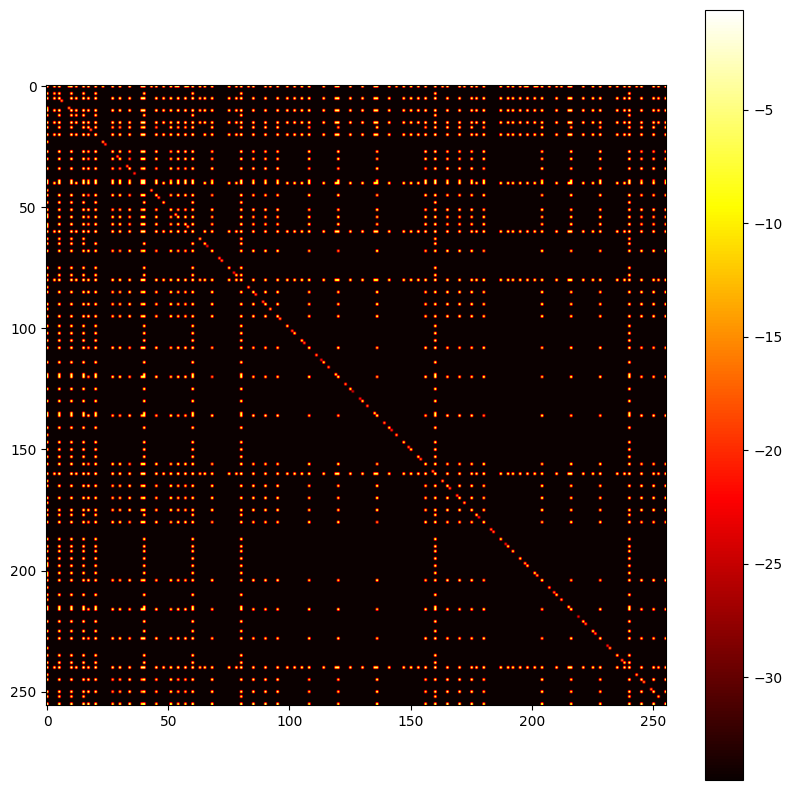

In [ ]:
# calculate chi exact optim

Depth = 1
theta_values = Parameters_bulk_1_Layers_nn_L4
theta_last_layer = Parameters_last_1_Layers_nn_L4

qc_optim = QuantumCircuit(L)
qc_optim.append(optimised_circuit(L, Depth, theta_values, theta_last_layer), range(L))
op_optim = Operator(qc_optim)
chi_exact_optim = np.array(Chi(op_optim))/D
plt.figure(figsize=(10,10))

shadow = chi_exact_optim.copy()

for i in range(N):
  for j in range(N):
    if (i != j and np.abs(shadow[i,j]) < 1e-3):
      shadow[i,j] = 0

plt.imshow(np.log(np.abs(shadow.real+1e-15)), cmap = 'hot')
plt.colorbar()
print('compressed')
clean_diag_optim, clean_half_no_diag_optim = select(L, D, N, chi_exact_optim, 5e-3, 1e-3)

In [ ]:
# calculate chi exact trotter

Depth = 1

qc_trotter = QuantumCircuit(L)
qc_trotter.append(Trotterization_ring_2nd(L, 1, Depth), range(L))
op_trotter = Operator(qc_trotter)
chi_exact_trotter = np.array(Chi(op_trotter))/D
#plt.figure(figsize=(10,10))
#plt.imshow(np.log(np.abs(chi_exact_trotter.real+1e-15)), cmap = 'hot')
#plt.colorbar()
print('trotter 2nd')
clean_diag_trotter, clean_half_no_diag_trotter = select(L, D, N, chi_exact_trotter, 5e-3, 1e-3)

trotter 2nd
Number of distinct elements on the diagonal which are above the threshold: 8
Number of not necessarily distinct elements in the lower half (no diagonal) which are above the threshold: 765
Number of distinct elements in the lower half (no diagonal) which are above the threshold: 35
off-diagonal elements:
((0.03741516176878808-0.1265965298793872j), (130, 0))
((0.03662568900952576-2.168404344971009e-19j), (40, 20))
((0.0332932497060726+0.003209748843410674j), (40, 10))
((0.030545308330928923+4.336808689942018e-19j), (160, 10))
((0.02291640869835645-0.11835690387374476j), (160, 0))
((0.010930805413668553+2.168404344971009e-19j), (136, 34))
((0.009177311628740071+0.0018205198887297712j), (170, 34))
((0.008008315772121084+8.131516293641283e-20j), (170, 85))
((0.005875405847643986+0.006099989228323009j), (195, 175))
((0.005085933088381643+0.0013892289546809065j), (235, 136))
((0.00450143516007215+0.014978436366007833j), (160, 85))
((0.003332439303453166+0.016798956254737596j), (19

In [ ]:
circuit_type = 'trotter'
hamiltonian = 'ring_2nd'
tomo_type = 'sqpt'
backend = fez
target_time = 1
trotter_steps = 1
Depth = 1
theta_values = Parameters_bulk_1_Layers_nn_L4
theta_last_layer = Parameters_last_1_Layers_nn_L4
scale = 'normal'
folder = 'Aug 2024'
shots_values = [1000]
K = 272
batch_size = 296
noise_model = 'noiseless'
real_or_imag_plus_or_minus = 'imag +'
index = 4
resilience_level = 0
optimization_level = 3
shots = 1024
circuits_per_device = 32

sim_layout = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

fez_layout = [0, 1, 2, 3,\
              4, 5, 6, 7,\
              8, 9, 10, 11,\
              12, 13, 14, 15,\
              20, 21, 22, 23,\
              24, 25, 26, 27,\
              28, 29, 30, 31,\
              32, 33, 34, 35,\
              40, 41, 42, 43,\
              44, 45, 46, 47,\
              48, 49, 50, 51,\
              52, 53, 54, 55,\
              60, 61, 62, 63,\
              64, 65, 66, 67,\
              68, 69, 70, 71,\
              72, 73, 74, 75,\
              80, 81, 82, 83,\
              84, 85, 86, 87,\
              88, 89, 90, 91,\
              92, 93, 94, 95,\
              100, 101, 102, 103,\
              104, 105, 106, 107,\
              108, 109, 110, 111,\
              112, 113, 114, 115,\
              120, 121, 122, 123,\
              124, 125, 126, 127,\
              128, 129, 130, 131,\
              132, 133, 134, 135,\
              140, 141, 142, 143,\
              144, 145, 146, 147,\
              148, 149, 150, 151,\
              152, 153, 154, 155]

initial_layout = fez_layout

metadata = {
    "circuit_type": circuit_type,
    "hamiltonian": hamiltonian,
    "tomo_type": tomo_type,
    "backend": backend,
    "L": L,
    "D": D,
    "N": N,
    "target_time": target_time,
    "trotter_steps": trotter_steps,
    "Depth": Depth,
    "theta_values": theta_values,#np.array(params_file['Parameters_bulk_'+str(Depth)+'_Layers']),
    "theta_last_layer": theta_last_layer,#np.array(params_file['Parameters_last_'+str(Depth)+'_Layers']),
    "scale": scale,
    "folder": folder,
    "K": K,
    "x_elements": np.array(x_elements_trotter[:32]),#np.array([x_do_symm[index]]),
    "y_elements": np.array(y_elements_trotter[:32]),#np.array([y_do_symm[index]]),
    "shots": shots,
    "options": options,
    "batch_size": batch_size,
    "noise_model": noise_model,
    "resilience_level": resilience_level,
    "optimization_level": optimization_level,
    "real_or_imag_plus_or_minus": real_or_imag_plus_or_minus,
    "initial_layout": initial_layout,
    "circuits_per_device": circuits_per_device
    }

In [ ]:
%%time

isa_circuits = experiment(**metadata)

trotter


FileNotFoundError: [Errno 2] Unable to synchronously create file (unable to open file: name = 'Aug 2024/trotter_ring_2nd_sqpt_L4_ibm_fez_nr_elements_32_shots_1024_opt_lvl_3_res_lvl_0_Layers_1_K_272_metadata.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)